In [1]:
'''Regularize Decision Tree Regressor
and show trees with various depths
'''
# Importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [2]:
from sklearn.tree import DecisionTreeRegressor


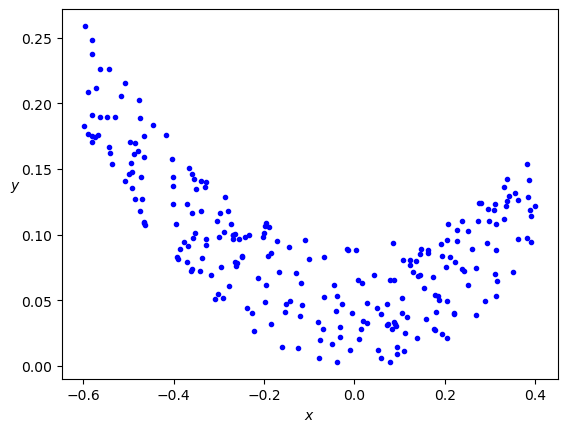

In [39]:
x = np.random.rand(250,1) - 0.6
y = 0.5*x**2 + (0.09*np.random.rand(x.shape[0],x.shape[1]))
plt.plot(x,y,'b.')
plt.xlabel("$x$")
plt.ylabel("$y$",rotation=0)
plt.show()

In [40]:
dtree_reg = DecisionTreeRegressor(max_depth=2)
dtree_reg.fit(x,y)

DecisionTreeRegressor(max_depth=2)

In [41]:
from sklearn.tree import export_graphviz
export_graphviz(dtree_reg,'./DTreeR',
feature_names=["x"],
rounded=True,filled=True)

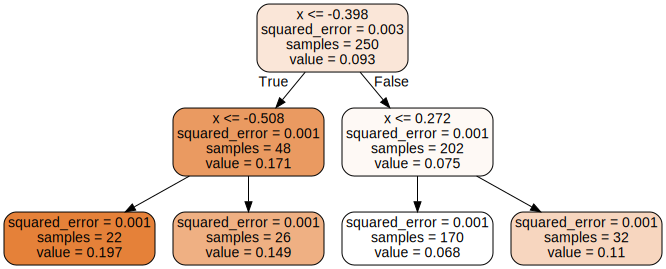

In [42]:
from graphviz import Source
Source.from_file('./DTreeR')

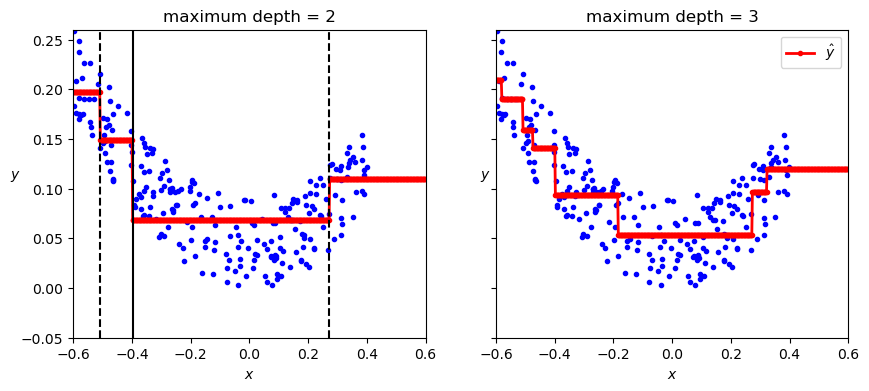

In [88]:
def regression_predictions_plot(reg,x,y,axes=[-0.6, 0.6, -0.05, 0.26]):
    plt.plot(x,y,'b.')
    plt.xlabel("$x$")
    plt.ylabel("$y$",rotation=0)
    x_topredict = np.linspace(-0.6,0.6,600).reshape(-1,1)
    y_predict = reg.predict(x_topredict)
    plt.plot(x_topredict,y_predict,"r.-", linewidth=2, label=r"$\hat{y}$")
    plt.axis(axes)


fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
regression_predictions_plot(dtree_reg,x,y)
thr0,thr1,thr2 = dtree_reg.tree_.threshold[[0,1,4]]
plt.plot([thr0,thr0],[-0.05, 0.26],'-k')
plt.plot([thr1,thr1],[-0.05, 0.26],'--k')
plt.plot([thr2,thr2],[-0.05, 0.26],'--k')
plt.title("maximum depth = 2")

plt.sca(axes[1])
dtree_reg_depth3 = DecisionTreeRegressor(max_depth=3)
dtree_reg_depth3.fit(x,y)
regression_predictions_plot(dtree_reg_depth3,x,y)
plt.title("maximum depth = 3")

plt.legend()
plt.show()

In [64]:
dtree_reg.tree_.threshold

array([-0.39819717, -0.50820127, -2.        , -2.        ,  0.27217205,
       -2.        , -2.        ])

In [101]:
""" So now I will  delimit the maximum depth to see the difference between a uregularized decision tree (left-overfitting!), and a regularized one (right) """
dtree_reg_unregularized  = DecisionTreeRegressor()
dtree_reg_regularized  = DecisionTreeRegressor(min_samples_leaf=10)
dtree_reg_unregularized.fit(x,y)
dtree_reg_regularized.fit(x,y)

DecisionTreeRegressor(min_samples_leaf=10)

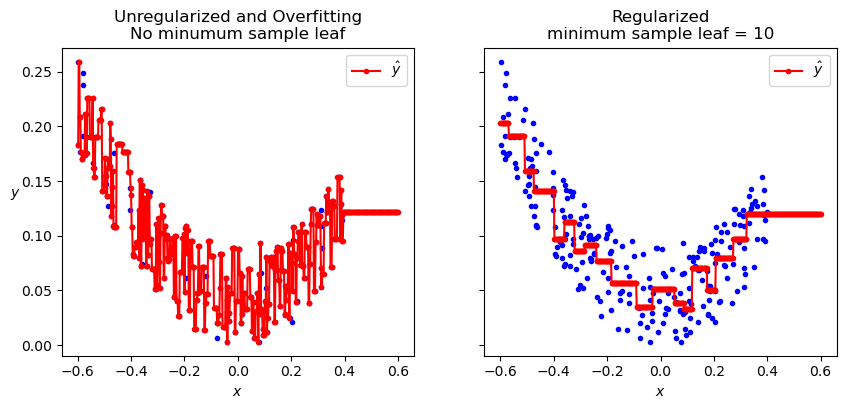

In [109]:
x_2predict = np.linspace(-0.6,0.6,600).reshape(-1,1)
y_predict_unreg = dtree_reg_unregularized.predict(x_2predict)
y_predict_reg = dtree_reg_regularized.predict(x_2predict)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.plot(x,y,'.b')
plt.plot(x_2predict,y_predict_unreg,'r.-',label=r"$\hat{y}$")
plt.legend()
plt.title("Unregularized and Overfitting\nNo minumum sample leaf")
plt.sca(axes[1])
plt.plot(x,y,'.b')
plt.plot(x_2predict,y_predict_reg,'r.-',label=r"$\hat{y}$")
plt.title("Regularized\nminimum sample leaf = 10")
plt.xlabel("$x$")
plt.legend()
plt.show()